In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
caminho = r'/content/drive/MyDrive/Colab Notebooks/datasets/BaseFuncionarios.xlsx'
data = pd.read_excel(caminho)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID RH                     234 non-null    int64         
 1   Nome                      234 non-null    object        
 2   Genero                    234 non-null    object        
 3   Cidade                    234 non-null    object        
 4   Data de Contratacao       234 non-null    datetime64[ns]
 5   Data de Demissao          17 non-null     datetime64[ns]
 6   Salario                   234 non-null    int64         
 7   Cargo                     234 non-null    object        
 8   Área                      234 non-null    object        
 9   Horas Extras              234 non-null    int64         
 10  Avaliação do Funcionário  234 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 20.2+ KB


In [4]:
# columns upper
data.columns = data.columns.str.upper()
print(f'numero de colunas: {len(data.columns)}')

numero de colunas: 11


In [5]:
#preencher salário nulos com media
data['SALARIO'].fillna(data['SALARIO'].mean(), inplace=True)

<ipython-input-5-a2c27e5b2d70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SALARIO'].fillna(data['SALARIO'].mean(), inplace=True)


In [6]:
# verificar valores nulos
data.isnull().sum()

,0
ID RH,0
NOME,0
GENERO,0
CIDADE,0
DATA DE CONTRATACAO,0
DATA DE DEMISSAO,217
SALARIO,0
CARGO,0
ÁREA,0
HORAS EXTRAS,0


In [7]:
data

,ID RH,NOME,GENERO,CIDADE,DATA DE CONTRATACAO,DATA DE DEMISSAO,SALARIO,CARGO,ÁREA,HORAS EXTRAS,AVALIAÇÃO DO FUNCIONÁRIO
0,195,Adelino,M,Porto Alegre,2015-04-23,NaT,11566,Coordenador,Administrativo,123,9.6
1,102,Adriano,M,Curitiba,2011-12-05,NaT,1459,Estagiário,Comercial,158,8.4
2,342,Alfredo,M,Campinas,2011-04-02,NaT,9958,Coordenador,Administrativo,200,7.4
3,320,Aline,F,São Paulo,2015-08-13,NaT,801,Estagiário,Operações,120,9.4
4,88,Aline,F,Salvador,2011-03-29,NaT,16855,Gerente,Administrativo,93,8.2
...,...,...,...,...,...,...,...,...,...,...,...
229,439,Vitor,M,São Paulo,2017-11-01,NaT,4224,Analista,Logística,55,7.2
230,34,Vitor,M,Rio de Janeiro,2013-08-25,NaT,15790,Gerente,Operações,113,9.0
231,464,Wesley,M,Rio de Janeiro,2015-11-17,NaT,1439,Estagiário,Logística,36,9.2
232,514,Yago,M,Salvador,2013-10-01,NaT,948,Estagiário,Comercial,113,7.8


In [8]:
# padronizar formatos
data.dtypes

,0
ID RH,int64
NOME,object
GENERO,object
CIDADE,object
DATA DE CONTRATACAO,datetime64[ns]
DATA DE DEMISSAO,datetime64[ns]
SALARIO,int64
CARGO,object
ÁREA,object
HORAS EXTRAS,int64


In [9]:
# calcular a media, mediana e desvio padrão do salário
data['SALARIO'].describe().loc[['mean', '50%', 'std']]

,SALARIO
mean,6708.435897
50%,6814.000000
std,4817.880382


Text(0, 0.5, 'Frequência')

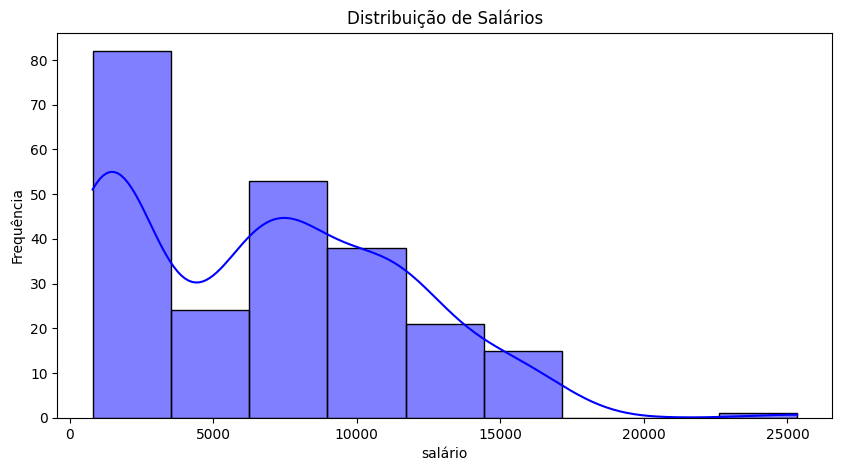

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data['SALARIO'], kde=True, color='blue')
plt.title('Distribuição de Salários')
plt.xlabel('salário')
plt.ylabel('Frequência')

<ipython-input-11-cb8627714525>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CARGO", y="SALARIO", data=data, palette="coolwarm")


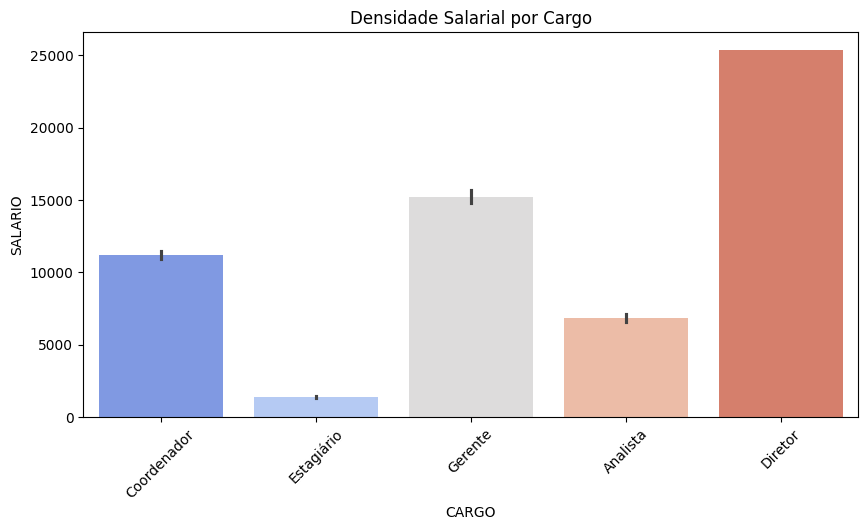

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="CARGO", y="SALARIO", data=data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Densidade Salarial por Cargo")
plt.show()

In [12]:
# funcionario com avaliação maior que 9.5
data.loc[(data['AVALIAÇÃO DO FUNCIONÁRIO'] > 9.5) & (data['DATA DE DEMISSAO'].isnull()), ['NOME', 'CARGO']]

,NOME,CARGO
0,Adelino,Coordenador
9,Amanda,Estagiário
46,Caio,Analista
48,Camila,Estagiário
55,Carolina,Analista
78,Flávio,Analista
101,Isabella,Analista
103,Isabelle,Analista
107,Jeferson,Coordenador
117,José,Coordenador


In [13]:
# verificar tunover em %
tot_demissoes = len(data[data['DATA DE DEMISSAO'].notnull()])
tot_funcionarios = len(data)
tunover = tot_demissoes / tot_funcionarios * 100
print(f'{tunover :.2f}%')

7.26%


In [14]:
# funcionarios por genero
tot_fem = len(data[data['GENERO'] == 'F'])
tot_masc = len(data[data['GENERO'] == 'M'])
print(f'total de  funcionario do sexo masculino: {tot_masc}. feminino {tot_fem}')

total de  funcionario do sexo masculino: 120. feminino 114


In [15]:
# tunover por cargo
tunover_por_cargo = data.groupby('CARGO')['DATA DE DEMISSAO'].apply(lambda x: (x.notnull().sum() / len(x) * 100)).reset_index(name='percentual')

In [16]:
tunover_por_cargo

,CARGO,percentual
0,Analista,7.692308
1,Coordenador,13.207547
2,Diretor,0.000000
3,Estagiário,3.658537
4,Gerente,5.000000


In [17]:
# salario medio por cargo
data.groupby('CARGO')['SALARIO'].mean()

,SALARIO
CARGO,
Analista,6844.230769
Coordenador,11179.188679
Diretor,25340.000000
Estagiário,1381.426829
Gerente,15240.500000


In [18]:
# normalizar salario numa escala de 0 a 1
data['SALARIO NORMALIZADO'] = (data['SALARIO'] - data['SALARIO'].min()) / (data['SALARIO'].max() - data['SALARIO'].min())

In [19]:
# calculo de percentis
import numpy as np
percentil25 = np.percentile(data['SALARIO'], 25)
percentil50 = np.percentile(data['SALARIO'], 50)
percentil75 = np.percentile(data['SALARIO'], 75)
data

,ID RH,NOME,GENERO,CIDADE,DATA DE CONTRATACAO,DATA DE DEMISSAO,SALARIO,CARGO,ÁREA,HORAS EXTRAS,AVALIAÇÃO DO FUNCIONÁRIO,SALARIO NORMALIZADO
0,195,Adelino,M,Porto Alegre,2015-04-23,NaT,11566,Coordenador,Administrativo,123,9.6,0.438689
1,102,Adriano,M,Curitiba,2011-12-05,NaT,1459,Estagiário,Comercial,158,8.4,0.026814
2,342,Alfredo,M,Campinas,2011-04-02,NaT,9958,Coordenador,Administrativo,200,7.4,0.373161
3,320,Aline,F,São Paulo,2015-08-13,NaT,801,Estagiário,Operações,120,9.4,0.000000
4,88,Aline,F,Salvador,2011-03-29,NaT,16855,Gerente,Administrativo,93,8.2,0.654224
...,...,...,...,...,...,...,...,...,...,...,...,...
229,439,Vitor,M,São Paulo,2017-11-01,NaT,4224,Analista,Logística,55,7.2,0.139492
230,34,Vitor,M,Rio de Janeiro,2013-08-25,NaT,15790,Gerente,Operações,113,9.0,0.610824
231,464,Wesley,M,Rio de Janeiro,2015-11-17,NaT,1439,Estagiário,Logística,36,9.2,0.025999
232,514,Yago,M,Salvador,2013-10-01,NaT,948,Estagiário,Comercial,113,7.8,0.005990


In [20]:
# nome e salarios das pessoas que estão com o salario acima da media
data.loc[data['SALARIO'] > percentil50, ['NOME', 'SALARIO']]

,NOME,SALARIO
0,Adelino,11566
2,Alfredo,9958
4,Aline,16855
5,Aline,8816
7,Amanda,11838
...,...,...
220,Stefan,9356
221,Suelen,8039
222,Thaís,8752
230,Vitor,15790


In [21]:
# existe quantas pessoas em cada cargo
data['CARGO'].value_counts()

,count
CARGO,
Estagiário,82
Analista,78
Coordenador,53
Gerente,20
Diretor,1


In [22]:
# faixa salarial
data['FAIXA SALARIAL'] = pd.cut(data['SALARIO'], bins=[0, 2000, 4000, 6000, 10000, data['SALARIO'].max()], labels=['Até 2K', '2K - 4K', '4K - 6K', '6K - 10k', '10k+'])

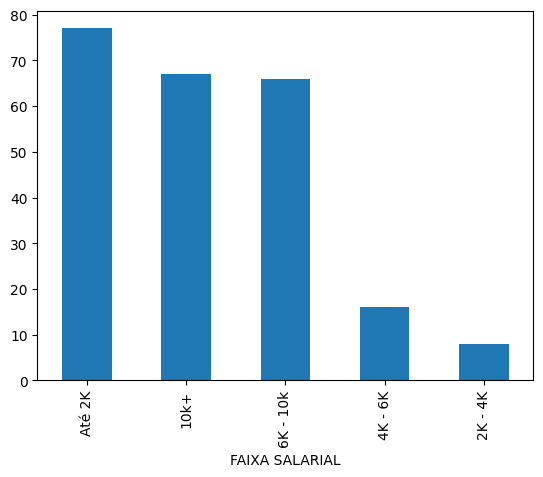

In [28]:
data['FAIXA SALARIAL'].value_counts().plot(kind='bar')
plt.show()